# Joint analyse of multimodal dataset using VIMCCA

This tutorial shows loading, preprocessing, VIMCCA joint analyse of multimodal dataset.

## Import packages
Here, we’ll import scbean along with other popular packages.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import scanpy as sc
from scbean.model import vimcca

# Command for Jupyter Notebooks only
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Loading dataset
This tutorial uses multimodal single cell data of human PBMCs from a healthy donor, which measured 36,601 genes and 106,056 peaks on 10,412 cells at the same time, which downloaded from [10X Genomics](https://support.10xgenomics.com/single-cell-multiome-atac-gex/datasets/1.0.0/pbmc_granulocyte_sorted_10k).


In [2]:
base_path = '/Users/zhongyuanke/data/'
file_rna = base_path + 'multimodal/atac_pbmc_10k/rna_filt.csv'
file_atac = base_path + 'multimodal/atac_pbmc_10k/atac.h5ad'

adata_x = sc.read_csv(file_rna)
adata_y = sc.read_h5ad(file_atac)

## Preprocessing using scanpy
Here, we filter and normalize each modal separately.

In [3]:
sc.pp.filter_genes(adata_x, min_cells=10)
sc.pp.filter_genes(adata_y, min_cells=10)
sc.pp.log1p(adata_x)
sc.pp.log1p(adata_y)
sc.pp.scale(adata_x)
sc.pp.scale(adata_y)

## Joint analyse using VIMCCA
The returned z represents the complementary low-dimensional features of the two modalities learned by VIMCCA, which can be used for downstream analysis.

In [4]:
z = vimcca.fit_integration(
    adata_x,
    adata_y,
    sparse_x=False,
    sparse_y=False,
    hidden_layers=[128, 64, 16, 8],
    epochs=50,
    weight=5
)

Model: "VIMCCA_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_x (InputLayer)           [(None, 21602)]      0                                            
__________________________________________________________________________________________________
encoder_z (Functional)          [(None, 8), (None, 8 2775376     inputs_x[0][0]                   
                                                                 inputs_x[0][0]                   
__________________________________________________________________________________________________
inputs_y (InputLayer)           [(None, 105949)]     0                                            
__________________________________________________________________________________________________
decoder_x (Functional)          (None, 21602)        2796834     encoder_z[0][2]         

Epoch 1/50
82/82 [==============================] - 37s 405ms/step - loss: 272711.4548
Epoch 2/50
82/82 [==============================] - 32s 386ms/step - loss: 267430.2125
Epoch 3/50
82/82 [==============================] - 32s 386ms/step - loss: 268638.5151
Epoch 4/50
82/82 [==============================] - 32s 389ms/step - loss: 265024.8099
Epoch 5/50
82/82 [==============================] - 32s 389ms/step - loss: 268585.0049
Epoch 6/50
82/82 [==============================] - 32s 391ms/step - loss: 269783.4025
Epoch 7/50
82/82 [==============================] - 32s 389ms/step - loss: 265431.6602
Epoch 8/50
82/82 [==============================] - 32s 388ms/step - loss: 265769.7515
Epoch 9/50
82/82 [==============================] - 34s 410ms/step - loss: 266398.4091
Epoch 10/50
82/82 [==============================] - 34s 414ms/step - loss: 264023.6071
Epoch 11/50
82/82 [==============================] - 33s 402ms/step - loss: 266286.0422
Epoch 12/50
82/82 [======================

## Visualization

In [5]:
adata_x.obsm['X_vimcca'] = z
sc.pp.neighbors(adata_x, use_rep='X_vimcca')
sc.tl.leiden(adata_x, resolution=3)
sc.tl.umap(adata_x)

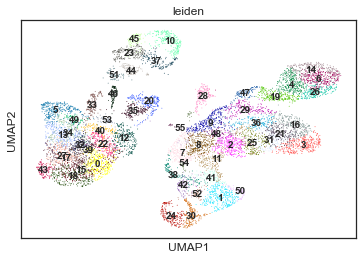

In [6]:
sc.pl.umap(adata_x, color='leiden', legend_loc='on data', s=3)